In [1]:
import datetime

In [2]:
import nltk
import string

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [5]:
from collections import Counter

In [6]:
from imblearn.under_sampling import RandomUnderSampler

In [7]:
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# NLP Pipeline 

![](images/pipeline-walkthrough1.png)

Below is a to do list when converting text into vector form: 

**Clean text and Create a Bag of Words (BoW)**
>1. Lowercase the text
2. Tokenize 
3. Strip out punctuation or undesirable text
4. Remove Stopwords 
5. Stemming or Lemmatizing
6. Compute N-Grams
7. Use this to create BoW

**Vectorize BoW**
>8. Term Frequencies
9. Document Frequencies
10. TF-IDF
11. Normalize vectors

Let's go through both what each of these steps are and how to do them in python with the following corpus of comments about data science...
 

In [8]:
#funtion to cut off extra intro paragraphs from beautiful soup scrape

# def trim_fat(string):
#     return string[35:-115]

In [9]:
# function to vectorize the type_of_material series into a y target vector.
def vectorize_type(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [10]:
#rate of correct predictions out of total predictions
def metrics_(tn, fp, fn, tp):
    accuracy = (tp + tn) / (tn + fn + tp + fp)
    print(f'accuracy = {accuracy}')
    recall = (tp) / (tp + fn)
    print(f'recall = {recall}')
    precision = (tp) / (tp + fp)
    print(f'precision = {precision}')

In [30]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$$%&\()*+,-./:;<=>@[\\]^_`{|}~'
    extras = '[\',.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
    punc_list = my_lil_punc_string + extras
    
    for char in string:
        if char in punc_list:  
            string = string.replace(char, "")
            
    return string

In [31]:
%%time
_2019 = pd.read_csv('data/drop2019_text_type.csv', index_col='Unnamed: 0')

CPU times: user 1.28 s, sys: 181 ms, total: 1.46 s
Wall time: 1.46 s


In [32]:
%%time
_2019_df = _2019.copy()

CPU times: user 614 µs, sys: 9 µs, total: 623 µs
Wall time: 617 µs


In [33]:
#define X. X is currently pandas series of unsplit strings

X = _2019_df.text

# manual punctuation work

In [34]:
# #function that removes string.punctuation w/out the '?'
# def punc_strip(string):
#     my_lil_punc_string = '!"#$%&\()*+,-./:;<=>@[\\]^_`{|}~'
#     extras = '[\',.“-”’!—:()?@]$;"–/#|&‘°\\…%<‐+¡«»_•*>›=€·■♦£💃🏽∙≠{}¿😂¥̇̃★§🇺🇸©！💣。^‑🔥😡″̀🚨⃣😤🌫`●🤭✓📖📹✋👀¢💔😞‒📲📺🎙￼😎↓❤️😘🎉🥂🦔🥩🐐🍑🤸🕳🌵⛽⚕🔊™†‾′̈״÷💜💛¨´💥☄́~‚⌚↑🏁🇰🇪🌎→🗣─‼◇😾🤷🏻♂✔💪®♪😱👍،¯⌘🌈🤩✨̊🤣−😉♥👏💩🤐💋🧓👮👴♀🥴🐎⚡🤔🙁×💯🚂🙏🏾่াং়ে্িু🍆💦🎥💌◾📱👋🏼؟🙂🚫❗🙄🛑🌧❄̶🤝；🤯🧵😹¶➡😏🔧✌➼◉🐱⚪̧̄➔😺😁🇬🇧👎🍺'
#     punc_list = my_lil_punc + extras
    
#     for char in string:
#         if char in punc_list:  
#             string = string.replace(char, "")
            
#     return string

In [35]:
%%time
X = X.apply(punc_strip)

CPU times: user 34.1 s, sys: 156 ms, total: 34.2 s
Wall time: 34.3 s


In [36]:
X[0]

' In his essay The CrackUp F Scott Fitzgerald wrote The test of a firstrate intelligence is the ability to hold two opposed ideas in the mind at the same time and still retain the ability to function On New Years Day 1919 the headlines in The New York Times gave a hint of how difficult that would be for Americans struggling to live up to the shimmering promises they had made to the world during the Great War which had ended just over a month before Poles newly independent but already threatened by their neighbors were calling on Americans to protect them Other countries like Ireland were on the cusp of independence but asking for help A bewildering set of new responsibilities was settling upon a country that had long cherished its freedom from the Old World Overwhelmingly Americans longed to get their old lives back But there was no clear road map to normalcy to use a word that began to gain traction in the chaos of the postwar years Grammarians faulted it as a clumsy neologism but tha

In [37]:
#function that removes string.punctuation w/out the '?'
def punc_strip(string):
    my_lil_punc_string = '!"#$%&\()*+,-./:;<=>@[\\]^_`{|}~'

    for char in string:
        if char in my_lil_punc_string:  
            string = string.replace(char, "")
            
    return string


In [38]:
# define y as a series of op-ed or news

y = _2019_df.type_of_material

In [39]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y = vectorize_type(y)

CPU times: user 10.7 ms, sys: 1.32 ms, total: 12 ms
Wall time: 11.1 ms


In [40]:
type(X)

pandas.core.series.Series

In [41]:
#turn series into list...

corpus = list(X)

In [42]:
corpus[0]

' In his essay The CrackUp F Scott Fitzgerald wrote The test of a firstrate intelligence is the ability to hold two opposed ideas in the mind at the same time and still retain the ability to function On New Years Day 1919 the headlines in The New York Times gave a hint of how difficult that would be for Americans struggling to live up to the shimmering promises they had made to the world during the Great War which had ended just over a month before Poles newly independent but already threatened by their neighbors were calling on Americans to protect them Other countries like Ireland were on the cusp of independence but asking for help A bewildering set of new responsibilities was settling upon a country that had long cherished its freedom from the Old World Overwhelmingly Americans longed to get their old lives back But there was no clear road map to normalcy to use a word that began to gain traction in the chaos of the postwar years Grammarians faulted it as a clumsy neologism but tha

# sklearn TfidfVectorizer(stop_words='english', strip_accents='ascii')

In [43]:
# %%time
# #create vectorizer

# vectorizer = TfidfVectorizer(#input='content', 
# #                 encoding='utf-8', 
# #                 decode_error='strict', 
#                  strip_accents=None, 
#                  lowercase=True, 
# #                 preprocessor=None, 
# #                 tokenizer=None, 
# #                 analyzer='word', 
#                  stop_words='english', 
# #                 token_pattern='(?u)\b\w\w+\b', 
# #                 ngram_range=(1, 1), 
# #                 max_df=1.0, 
# #                 min_df=1, 
#                  max_features=None, 
# #                 vocabulary=None, 
# #                 binary=False, 
# #                 dtype=<class 'numpy.float64'>, 
# #                 norm='l2', 
# #                 use_idf=True, 
# #                 smooth_idf=True, 
# #                 sublinear_tf=False
# )
# X = vectorizer.fit_transform(corpus)

In [44]:
# %%time
# feature_names = vectorizer.get_feature_names()

In [45]:
# %%time
# stop_words = vectorizer.get_stop_words()

In [46]:
# feature_names;

In [47]:
# len(feature_names)

In [48]:
# len(stop_words)

# resample class size w/ imbalanced learn

In [49]:
# y.shape

In [50]:
# X.shape

In [51]:
# %%time
# #balance the classes

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

In [52]:
# %%time
# #X, y --> X_resampled, y_resampled
# X_resampled, y_resampled = rus.fit_resample(X, y)


# #return a list of tuples for item, and count of item. in this case 4139 each
# print(sorted(Counter(y_resampled).items()))

In [53]:
# y_resampled.shape

In [54]:
# X_resampled.shape

In [55]:
# %%time
# #test, train, split

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

# Multinomial Naive Bayes/imbalanced learn/TFIDF vectorizer

In [56]:
# %%time

# multinm_clf = MultinomialNB()
# multinm_clf.fit(X_train, y_train)

In [57]:
#multinm_clf.class_count_

In [58]:
#y_pred = multinm_clf.predict(X_test)

In [59]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# multinm_clf.score(X_test, y_test)

In [60]:
#confusion_matrix(y_true = y_test, y_pred = y_pred)

In [61]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)

In [62]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# accuracy

In [63]:
# # rate of actual op-ed articles, out of all the actual od-ed articles

# recall = (tp) / (tp + fn)
# recall

In [64]:
# # rate of correct predictions of op-ed articles out of all predictions

# precision = (tp) / (tp + fp)
# precision

In [65]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# print(f'accuracy = {accuracy}')
# recall = (tp) / (tp + fn)
# print(f'recall = {recall}')
# precision = (tp) / (tp + fp)
# print(f'precision = {precision}')

# random forest classifier

In [66]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
#                                               *, 
#                                               criterion='gini', 
#                                               max_depth=None, 
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, 
#                                               max_features='auto', 
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False, 
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False, 
#                                               class_weight=None, 
#                                               ccp_alpha=0.0, 
#                                               max_samples=None)

In [67]:
# %%time

# rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [68]:
# %%time

# rf_clf.fit(X_train, y_train)

In [69]:
# y_pred = rf_clf.predict(X_test)

In [70]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# rf_clf.score(X_test, y_test)

In [71]:
# confusion_matrix(y_true = y_test, y_pred = y_pred)

In [72]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)

In [73]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# accuracy

In [74]:
# # rate of actual op-ed articles, out of all the actual od-ed articles

# recall = (tp) / (tp + fn)
# recall

In [75]:
# # rate of correct predictions of op-ed articles out of all predictions

# precision = (tp) / (tp + fp)
# precision

In [76]:
# #rate of correct predictions out of total predictions

# accuracy = (tp + tn) / (tn + fn + tp + fp)
# print(f'accuracy = {accuracy}')
# recall = (tp) / (tp + fn)
# print(f'recall = {recall}')
# precision = (tp) / (tp + fp)
# print(f'precision = {precision}')

In [77]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, 
#                                               *, 
#                                               criterion='gini', 
#                                               max_depth=None, 
#                                               min_samples_split=2, 
#                                               min_samples_leaf=1, 
#                                               min_weight_fraction_leaf=0.0, 
#                                               max_features='auto', 
#                                               max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, 
#                                               min_impurity_split=None, 
#                                               bootstrap=True, 
#                                               oob_score=False, 
#                                               n_jobs=None, 
#                                               random_state=None, 
#                                               verbose=0, 
#                                               warm_start=False, 
#                                               class_weight=None, 
#                                               ccp_alpha=0.0, 
#                                               max_samples=None)

# NLTK 

In [78]:
nltk_2019_df = _2019.copy()

In [79]:
#define X. X is currently pandas series of unsplit strings

X_nltk = nltk_2019_df.text

In [80]:
# define y as a series of op-ed or news

y_nktk = nltk_2019_df.type_of_material

In [81]:
%%time
# vectorize y in to (1, 0) (op-ed, news)

y_nltk = vectorize_type(y_nktk)

CPU times: user 10.3 ms, sys: 1.19 ms, total: 11.4 ms
Wall time: 10.5 ms


In [82]:
#turn series into list...

corpus_nltk = list(X_nltk)

### tokenize w/ nltk

In [83]:
# %%time
# from nltk.tokenize import RegexpTokenizer
# regex_tokenizer = nltk.RegexpTokenizer(r"\w+")
# tokenized_punc = [regex_tokenizer.tokenize(article.lower())for article in corpus_nltk]

In [84]:
# (len(tokenized_punc[0])) #2218

In [85]:
# len(tokenized_punc)

In [86]:
# from nltk.tokenize import word_tokenize

In [87]:
# type(word_tokenize)

In [88]:
# %%time
# tokenized = [word_tokenize(article.lower()) for article in corpus_nltk]

# CPU times: user 4min 46s, sys: 2.39 s, total: 4min 48s
# Wall time: 4min 50s

In [89]:
# #list of list of strings. one list of strings per documents. list are various lengths around 1000

# len(tokenized[0]) #2596

## take out stop work via ntlk. does this work against sklearn when i vectorize

In [90]:
# %%time
# stop = set(stopwords.words('english'))
# tokenized_docs = [[word for word in words if word not in stop]
#             for words in tokenized_punc]

In [91]:
# #hopefully this reduced the number of strings / list

# len(tokenized[1])

In [92]:
# #docs is new tokenized, but with stop words removed

# len(tokenized_docs)

# stemming/lemmatization

In [93]:
# from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem.wordnet import WordNetLemmatizer

In [94]:
# porter = PorterStemmer()
snowball = SnowballStemmer('english')
# wordnet = WordNetLemmatizer()

In [95]:
# %%time
# docs_porter = [[porter.stem(word) for word in words]
#                    for words in docs]
# docs_snowball = [[snowball.stem(word) for word in words]
#                      for words in docs]
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                     for words in docs]

# CPU times: user 14min 59s, sys: 18.4 s, total: 15min 18s
# Wall time: 15min 26s

In [96]:
# %%time
# docs_porter = [[porter.stem(word) for word in words]
#                    for words in docs]

# CPU times: user 7min 16s, sys: 5.21 s, total: 7min 21s
# Wall time: 7min 22s

In [97]:
# %%time
# snowball_stemm = [[snowball.stem(word) for word in words]
#                      for words in tokenized_docs]

# # CPU times: user 5min 5s, sys: 5.98 s, total: 5min 11s
# # Wall time: 5min 13s

In [98]:
# %%time
# docs_wordnet = [[wordnet.lemmatize(word) for word in words]
#                     for words in docs]

# CPU times: user 1min 24s, sys: 4.5 s, total: 1min 28s
# Wall time: 1min 30s

In [99]:
# %%time
# ## Print the stemmed and lemmatized words from the first document
# print("%16s %16s %16s %16s" % ("word", "porter", "snowball", "lemmatizer"))
# for i in range(min(len(docs_porter[0]), len(docs_snowball[0]), len(docs_wordnet[0]))):
#     p, s, w = docs_porter[0][i], docs_snowball[0][i], docs_wordnet[0][i]
#     if len(set((p, s, w))) != 1:
#         print("%16s %16s %16s %16s" % (docs[0][i], p, s, w))
#         print(docs[0][i], w)


In [100]:
#docs and lemmatizer are the same?

# I choose SNOWBALL!!!! to sklearn

In [101]:
(corpus_nltk[0])

"', 'In his essay “The Crack-Up,” F. Scott Fitzgerald wrote, “The test of a first-rate intelligence is the ability to hold two opposed ideas in the mind at the same time, and still retain the ability to function.”', 'On New Year’s Day 1919, the headlines in The New York Times gave a hint of how difficult that would be for Americans, struggling to live up to the shimmering promises they had made to the world during the Great War, which had ended just over a month before.', 'Poles, newly independent but already threatened by their neighbors, were calling on Americans to protect them. Other countries, like Ireland, were on the cusp of independence, but asking for help. A bewildering set of new responsibilities was settling upon a country that had long cherished its freedom from the Old World.', 'Overwhelmingly, Americans longed to get their old lives back. But there was no clear road map to “normalcy,” to use a word that began to gain traction in the chaos of the postwar years. Grammarian

In [102]:
len(corpus_nltk[0])

13168

In [103]:
# snowball = SnowballStemmer('english')
# snowball_tokenized = [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [104]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.01 µs


In [105]:
test_token = snowball_tokenize(corpus_nltk[0])

In [106]:
#2596
len(test_token)

2596

In [107]:
type(corpus_nltk)

list

In [141]:
%%time
#create vectorizer

vectorizer = TfidfVectorizer(#input='content', 
#                 encoding='utf-8', 
#                 decode_error='strict', 
                 strip_accents=None, 
                 lowercase=True, 
#                 preprocessor=None, 
                 tokenizer=snowball_tokenize, 
#                 analyzer='word', 
                 stop_words=None, 
#                 token_pattern='(?u)\b\w\w+\b', 
#                 ngram_range=(1, 1), 
                 max_df=0.85, 
                 min_df=0.15, 
                 max_features=None, 
#                 vocabulary=None, 
#                 binary=False, 
#                 dtype=<class 'numpy.float64'>, 
#                 norm='l2', 
#                 use_idf=True, 
#                 smooth_idf=True, 
#                 sublinear_tf=False
)

CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 44.1 µs


In [142]:
%%time
print(datetime.datetime.now())

X_snowball = vectorizer.fit_transform(corpus_nltk)

2020-12-03 21:38:44.460351
CPU times: user 9min 54s, sys: 900 ms, total: 9min 55s
Wall time: 9min 55s


In [143]:
vectorizer

TfidfVectorizer(max_df=0.85, min_df=0.15,
                tokenizer=<function snowball_tokenize at 0x7fa35d4d1830>)

In [144]:
#class sklearn.feature_extraction.text.CountVectorizer(*, 
#                                                       input='content', 
#                                                       encoding='utf-8', 
#                                                       decode_error='strict', 
#                                                       strip_accents=None, 
#                                                       lowercase=True, 
#                                                       preprocessor=None, 
#                                                       tokenizer=None, 
#                                                       stop_words=None, 
#                                                       token_pattern='(?u)\b\w\w+\b', 
#                                                       ngram_range=(1, 1), 
#                                                       analyzer='word', 
#                                                       max_df=1.0, 
#                                                       min_df=1, 
#                                                       max_features=None, 
#                                                       vocabulary=None, 
#                                                       binary=False, 
#                                                       dtype=<class 'numpy.int64'>
#)

In [145]:
count_vectorizer = CountVectorizer(strip_accents='None',
                                   lowercase=True,
                                   tokenizer=snowball_tokenize,
                                   stop_words='english',
                                   max_features=None)

# balance classes

In [146]:
# %%time
# #balance the classes

# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=0)

In [147]:
# %%time
# #X, y --> X_resampled, y_resampled
# X_resampled, y_resampled = rus.fit_resample(X_snowball, y_nltk)
# print(sorted(Counter(y_resampled).items()))

In [148]:
# %%time
# #test, train, split

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

In [149]:
# %%time

# rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [150]:
# %%time

# rf_clf.fit(X_train, y_train)

In [151]:
#y_pred = rf_clf.predict(X_test)

In [152]:
# #clf.score = accuracy = 'true'(pos/neg) / total

# rf_clf.score(X_test, y_test)

In [153]:
# tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
# (tn, fp, fn, tp)
# metrics_(tn, fp, fn, tp)
# print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
# print(rf_clf.n_features_)
# print(rf_clf.n_classes_)
# print(rf_clf.n_outputs_)
# # what are the actual parametrs set in the function. something specific about the random forest i forgot

In [154]:
nltk_features = vectorizer.get_feature_names()

In [155]:
nltk_stop = vectorizer.get_stop_words()

In [156]:
type(nltk_features)

list

In [157]:
# len(nltk_stop)

In [158]:
X_snowball.shape

(37728, 532)

In [159]:
#feature_import = rf_clf.feature_importances_

In [160]:
# property feature_importances_
# The impurity-based feature importances.

# The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

# Warning: impurity-based feature importances can be misleading for high cardinality features (many unique values). See sklearn.inspection.permutation_importance as an alternative.

# Returns
# feature_importances_ndarray of shape (n_features,)
# The values of this array sum to 1, unless all trees are single node trees consisting of only the root node, in which case it will be an array of zeros.



In [161]:
# feat_scores = pd.Series(feature_import,
#                            index=nltk_features)
# feat_scores = feat_scores.sort_values()
# ax = feat_scores.plot(kind='barh', figsize=(10,20))
# ax.set_title('"Decrease in Impurity" Importance')
# ax.set_xlabel('Average contribution to the reduction in variance');

In [162]:
# r = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=0)
# for index in r.importances_mean.argsort()[::-1]:
#     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#         print(f"{feature_names[i]:<8}"
#               f"{r.importances_mean[i]:.3f}"
#               f" +/- {r.importances_std[i]:.3f}")

In [163]:
# %%time
# test_x = test_vectorizer.fit_transform(corpus_nltk)

In [164]:
%%time
#balance the classes

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)

#X, y --> X_resampled, y_resampled
X_resampled, y_resampled = rus.fit_resample(X_snowball, y_nltk)
print(sorted(Counter(y_resampled).items()))
print(rus)

[(0, 3957), (1, 3957)]
RandomUnderSampler(random_state=0)
CPU times: user 13 ms, sys: 6.06 ms, total: 19.1 ms
Wall time: 18 ms


In [165]:
%%time
#test, train, split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=50)

CPU times: user 6.16 ms, sys: 11.8 ms, total: 17.9 ms
Wall time: 16.9 ms


In [166]:
%%time
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

CPU times: user 686 ms, sys: 16.2 ms, total: 702 ms
Wall time: 702 ms


In [167]:
%%time
print(datetime.datetime.now())
print(f'vectorizer = {vectorizer}')
tn, fp, fn, tp = confusion_matrix(y_true = y_test, y_pred = y_pred).ravel()
(tn, fp, fn, tp)
metrics_(tn, fp, fn, tp)
print(f'tn={tn}, fp={fp}, fn={fn}, tp={tp})')
print(f'num_features = {rf_clf.n_features_}')
#print(rf_clf.n_classes_)
#print(rf_clf.n_outputs_)
feat_names = vectorizer.get_feature_names()
feature_import = rf_clf.feature_importances_
print(type(feature_import))
feature_import.shape
print(f'vectorizer = {vectorizer}')
# what are the actual parametrs set in the function. something specific about the random forest i forgot

2020-12-03 21:48:41.308268
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.15,
                tokenizer=<function snowball_tokenize at 0x7fa35d4d1830>)
accuracy = 0.9044972208185953
recall = 0.9465346534653465
precision = 0.8762603116406966
tn=834, fp=135, fn=54, tp=956)
num_features = 532
<class 'numpy.ndarray'>
vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.15,
                tokenizer=<function snowball_tokenize at 0x7fa35d4d1830>)
CPU times: user 14.8 ms, sys: 4.48 ms, total: 19.3 ms
Wall time: 16.6 ms


In [168]:
feat_names = vectorizer.get_feature_names()

In [169]:
type(feature_import)

numpy.ndarray

In [170]:
X_test.shape

(1979, 532)

In [171]:
y_test.shape

(1979,)

2020-12-03 22:21:48.031855
CPU times: user 50.7 ms, sys: 2.67 ms, total: 53.4 ms
Wall time: 52.3 ms


Text(0.5, 0, 'Average contribution to the reduction in variance')

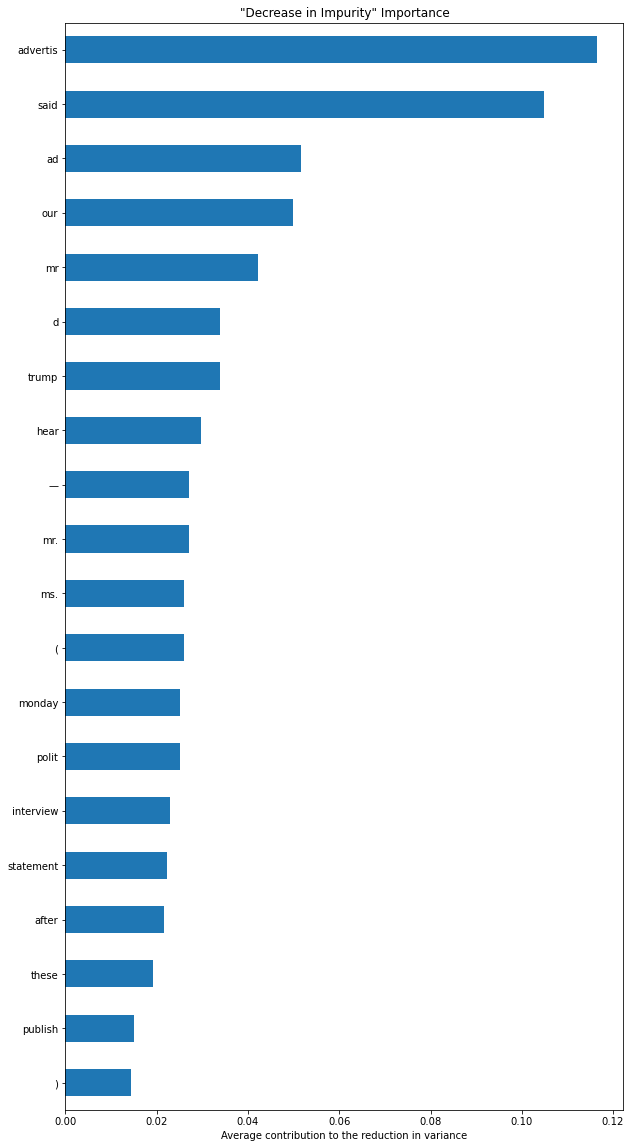

In [176]:
%%time
print(datetime.datetime.now())
feat_scores = pd.Series(feature_import,
                           index=feat_names)
feat_scores = feat_scores.sort_values()
ax = feat_scores[-20:].plot(kind='barh', figsize=(10,20))
ax.set_title('"Decrease in Impurity" Importance')
ax.set_xlabel('Average contribution to the reduction in variance');

In [179]:
%%time
print(datetime.datetime.now())
r = permutation_importance(rf_clf, X_test.toarray(), y_test, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{feat_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

2020-12-03 22:26:18.216706
advertis0.120 +/- 0.006
said    0.028 +/- 0.004
polit   0.006 +/- 0.001
trump   0.006 +/- 0.002
her     0.001 +/- 0.001
CPU times: user 4min 27s, sys: 3.67 s, total: 4min 30s
Wall time: 4min 30s


In [178]:
feat_scores[-60:]

like         0.002263
here         0.002266
ani          0.002597
play         0.002604
twitter      0.002747
includ       0.002927
t            0.003112
accord       0.003253
three        0.003294
$            0.003450
he           0.003593
american     0.003758
friday       0.003843
so           0.003863
can          0.003987
without      0.003991
us           0.004327
month        0.004504
follow       0.004575
event        0.004579
wednesday    0.004580
are          0.004587
what         0.004716
she          0.004871
fact         0.005483
today        0.005975
email        0.006363
comment      0.006576
america      0.007122
or           0.007769
everi        0.008160
polici       0.008570
democrat     0.008979
:            0.009000
director     0.009399
power        0.010755
ms           0.011349
tuesday      0.011384
had          0.012618
two          0.013570
)            0.014402
publish      0.015092
these        0.019121
after        0.021655
statement    0.022353
interview 